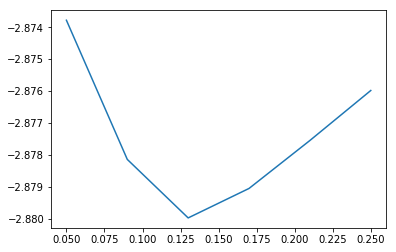

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def markovChain(alpha ,N, M):
    """
    Creates a Markov chain sampled with the square of the trial wave function with a as extra input parameter.
    Samples are d-dimensional. Chain is N samples long and for M walkers.

    :param trialFunction: The trial wave function used to sample the chain. Should have two input parameters: a position x and a
    :param a: A parameter of the trial wave function. Usually a constant
    :param N: Length of the chain
    :param d: Dimension of the samples 
    :param M: Number of different walkers
    :returns: A matrix of N x M x d. 
    """
    d = 6
    r = np.random.randn(d, M) 
    samples = np.empty([d, N, M])
    p = trial_wave_function(alpha, r)**2
    acor = np.zeros((N,1))
    for i in range(0,N):
        rn = r + 0.1*np.random.randn(d, M)
        pn = trial_wave_function(alpha, r)**2
    
        u = np.random.rand(M)
        u[pn >= p] = 100
        p[pn >= p] = pn[pn >= p]
        r[:,pn >= p] = rn[:,pn >= p]
        p[u < pn/p] = pn[u < pn/p]
        r[:,u < pn/p] = rn[:,u < pn/p]
            
        samples[:,i,:] =  r

    #samples = np.array(samples)
    return samples



def six_d_metropolis(alpha, N, n_walkers):
    rn = np.zeros((dim, N, n_walkers))
    r = np.random.randn(dim, n_walkers)
    
    for i in range(N):
        r_trial = r + (0.1*np.random.randn(dim, n_walkers))
        ratio = (trial_wave_function(alpha, r_trial) / trial_wave_function(alpha, r))**2
        eta = np.random.uniform(0,1,(dim,n_walkers))
        rn[:,i,:] = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
        r = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))

    return(rn)

def trial_wave_function(alpha, r):
    r1 = np.linalg.norm(r[:3,:], axis = 0)
    r2 = np.linalg.norm(r[3:,:], axis = 0)
    r12 = np.linalg.norm(r[:3,:]-r[3:,:], axis = 0)
    trial_wave = np.exp(-2*r1 - 2*r2 + r12/(2*(1+alpha*r12)))
    return(trial_wave)

def calc_Eloc(alpha, r):
    r1_unit = r[:3,:,:] / np.linalg.norm(r[:3,:,:], axis = 0)
    r2_unit = r[3:,:,:] / np.linalg.norm(r[3:,:,:], axis = 0)
    r12_unit = r1_unit - r2_unit
    r12 = np.linalg.norm(r[:3,:,:] - r[3:,:,:], axis = 0)
    E_loc = -4 + np.sum(r12_unit * (r[:3,:,:] - r[3:,:,:]), axis = 0) * 1/(r12*(1+alpha*r12)**2) - 1/(r12*(1+alpha*r12)**3) - 1/(4*(1+alpha*r12)**4) + 1/r12
    return(E_loc)

alpha = np.linspace(0.05, 0.25, 6)
dim = 6
E_local = np.zeros(len(alpha))
E = np.zeros(len(alpha))
k = 4000

for i in range(len(alpha)):
    r = six_d_metropolis(alpha[i], 30000, 300)
    #r = markovChain(alpha[i], 10000, 5)
    E_local = calc_Eloc(alpha[i], r)
    E_local = E_local[k:]
    E[i] = np.mean(E_local)

plt.figure()
plt.plot(alpha, E)
    





In [21]:
print(E[0])

-2.87066512459
